# CNN Example From Flowers by Keras (Color Version)


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import datasets, layers, models, regularizers

from os import listdir
from os.path import isfile, join
import random
import warnings



import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam



IMG_W=150
IMG_H=150

In [2]:
def getFolder(thePath,isFile=True):
    return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]


def getImagesAndLabels(tPath):
    labels=getFolder(tPath,False)

    
    tImages,tLabels=None,None

    for label in labels:
        imgFolder=join(tPath,label)
        files= [f for f in listdir(imgFolder) if isfile(join(imgFolder, f))]
        for file in files:
            imageFile=join(imgFolder,file)
            img=plt.imread(imageFile)
            img = cv2.resize(img, (IMG_W,IMG_H))
            if tImages is None:
                tImages, tLabels =[img], [label]
            else:
                tImages.append( img )
                tLabels.append(label)
        print("finish=",label,"total=",len(tImages))
    return (tImages,tLabels,len(labels))

In [3]:
%%bash
x=$(dpkg -l|grep imagemagick);[ ${#x} -eq 0 ]&&sudo apt install -y imagemagick
[ ! -f ./flower_photos.tgz ]&&wget http://download.tensorflow.org/example_images/flower_photos.tgz ; tar xzf ./flower_photos.tgz 
find ./flower_photos|grep jpg|head -n 10|xargs -i -t identify {} 2>>/tmp/log

./flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg JPEG 320x230 320x230+0+0 8-bit sRGB 34KB 0.000u 0:00.000
./flower_photos/daisy/12701063955_4840594ea6_n.jpg JPEG 320x240 320x240+0+0 8-bit sRGB 65.3KB 0.000u 0:00.000
./flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg JPEG 320x213 320x213+0+0 8-bit sRGB 26KB 0.000u 0:00.000
./flower_photos/daisy/5673728_71b8cb57eb.jpg JPEG 500x332 500x332+0+0 8-bit sRGB 30.2KB 0.000u 0:00.000
./flower_photos/daisy/11834945233_a53b7a92ac_m.jpg JPEG 193x240 193x240+0+0 8-bit sRGB 21.5KB 0.000u 0:00.000
./flower_photos/daisy/9204730092_a7f2182347.jpg JPEG 500x332 500x332+0+0 8-bit sRGB 127KB 0.000u 0:00.000
./flower_photos/daisy/7066602021_2647457985_m.jpg JPEG 240x240 240x240+0+0 8-bit sRGB 40.7KB 0.000u 0:00.000
./flower_photos/daisy/43474673_7bb4465a86.jpg JPEG 500x375 500x375+0+0 8-bit sRGB 84.6KB 0.000u 0:00.000
./flower_photos/daisy/5876455546_32049e5585.jpg JPEG 500x333 500x333+0+0 8-bit sRGB 71.8KB 0.000u 0:00.000
./flower_photos/daisy/512177035_70a

In [4]:
from sklearn.model_selection import train_test_split
basePath='./flower_photos'
imgs,labels,class_cnt=getImagesAndLabels(basePath)


finish= daisy total= 633
finish= tulips total= 1432
finish= dandelion total= 2330
finish= roses total= 2971
finish= sunflowers total= 3670


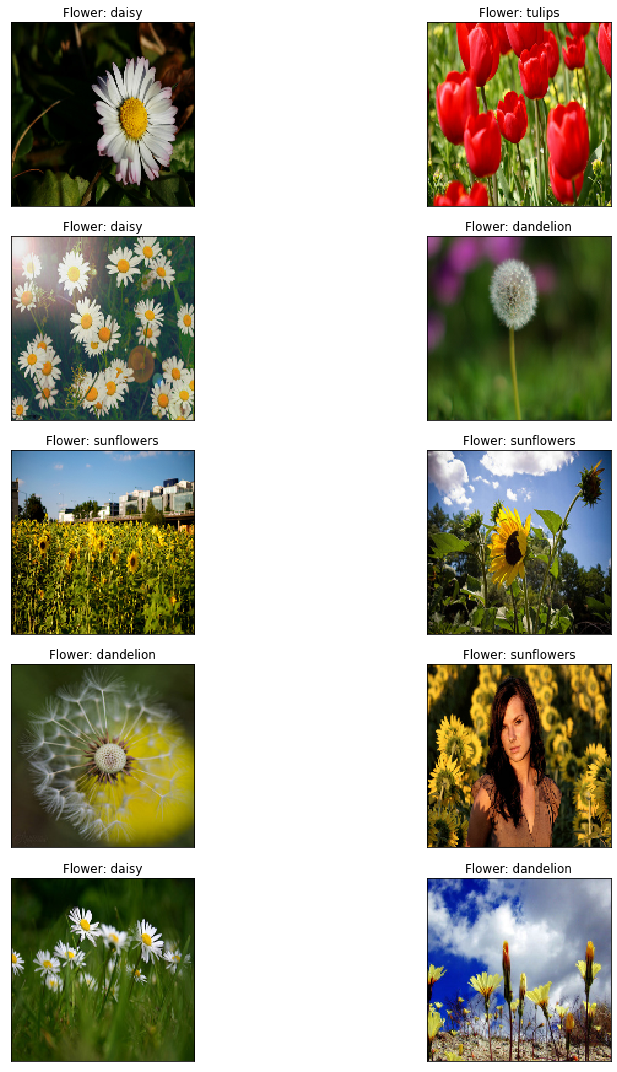

In [5]:
count=0
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (2):
        l=random.randint(0,len(imgs))
        ax[i,j].imshow(imgs[l])
        ax[i,j].set_title('Flower: '+ labels[l])
        ax[i,j].grid(False)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        count+=1
plt.tight_layout()


In [9]:
le=LabelEncoder()
labels=np.array(labels)

Y=le.fit_transform(labels)
Y=to_categorical(Y,class_cnt)
imgs=np.array(imgs)
imgs=imgs/255.

In [10]:
train_images,test_images,train_labels,test_labels=train_test_split(imgs,Y,test_size=0.25, random_state=99)

In [12]:
np.random.seed(42)
random.seed(42)
tf.set_random_seed(42)

In [42]:

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(5, activation = "softmax"))

In [43]:
batch_size=128
epochs=50

from tensorflow.python.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [44]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_images)

In [45]:


model.compile(optimizer=Adam(lr=0.001),\
              loss='categorical_crossentropy',metrics=['accuracy'])


In [46]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 18, 18, 96)       

In [47]:
batch_size=80
epochs=20
History = model.fit_generator(datagen.flow(train_images,train_labels, batch_size=batch_size),
                      epochs = epochs, validation_data = (test_images,test_labels), steps_per_epoch=train_images.shape[0] // batch_size)

Epoch 1/20
34/34 [==============================] - 7s 220ms/step - loss: 1.3663 - acc: 0.4046 - val_loss: 1.1760 - val_acc: 0.5261
Epoch 2/20
34/34 [==============================] - 7s 213ms/step - loss: 1.1229 - acc: 0.5588 - val_loss: 1.1016 - val_acc: 0.5392
Epoch 3/20
34/34 [==============================] - 7s 210ms/step - loss: 1.0105 - acc: 0.5939 - val_loss: 1.0346 - val_acc: 0.5991
Epoch 4/20
34/34 [==============================] - 7s 208ms/step - loss: 0.9644 - acc: 0.6107 - val_loss: 0.9997 - val_acc: 0.6078
Epoch 5/20
34/34 [==============================] - 7s 202ms/step - loss: 0.9694 - acc: 0.6075 - val_loss: 0.9495 - val_acc: 0.6405
Epoch 6/20
34/34 [==============================] - 7s 211ms/step - loss: 0.8821 - acc: 0.6566 - val_loss: 0.8577 - val_acc: 0.6765
Epoch 7/20
34/34 [==============================] - 7s 200ms/step - loss: 0.8636 - acc: 0.6631 - val_loss: 0.9318 - val_acc: 0.6460
Epoch 8/20
918/34 [=========================================================

34/34 [==============================] - 7s 211ms/step - loss: 0.8125 - acc: 0.6901 - val_loss: 0.8519 - val_acc: 0.6765
Epoch 9/20
34/34 [==============================] - 7s 205ms/step - loss: 0.8209 - acc: 0.6856 - val_loss: 0.8132 - val_acc: 0.6972
Epoch 10/20
34/34 [==============================] - 7s 206ms/step - loss: 0.8072 - acc: 0.6942 - val_loss: 0.7953 - val_acc: 0.7004
Epoch 11/20
34/34 [==============================] - 7s 207ms/step - loss: 0.7974 - acc: 0.6838 - val_loss: 0.8387 - val_acc: 0.6928
Epoch 12/20
34/34 [==============================] - 7s 206ms/step - loss: 0.7594 - acc: 0.7058 - val_loss: 0.7459 - val_acc: 0.7266
Epoch 13/20
34/34 [==============================] - 7s 205ms/step - loss: 0.7637 - acc: 0.7092 - val_loss: 0.7274 - val_acc: 0.7375
Epoch 14/20
34/34 [==============================] - 7s 211ms/step - loss: 0.7024 - acc: 0.7290 - val_loss: 0.7482 - val_acc: 0.7113
Epoch 15/20
34/34 [==============================] - 7s 202ms/step - loss: 0.7097 

34/34 [==============================] - 7s 207ms/step - loss: 0.6760 - acc: 0.7434 - val_loss: 0.7044 - val_acc: 0.7375
Epoch 17/20
34/34 [==============================] - 7s 206ms/step - loss: 0.6289 - acc: 0.7590 - val_loss: 0.6686 - val_acc: 0.7364
Epoch 18/20
34/34 [==============================] - 7s 207ms/step - loss: 0.6289 - acc: 0.7564 - val_loss: 0.7181 - val_acc: 0.7397
Epoch 19/20
34/34 [==============================] - 7s 206ms/step - loss: 0.6657 - acc: 0.7500 - val_loss: 0.6818 - val_acc: 0.7484
Epoch 20/20
34/34 [==============================] - 7s 206ms/step - loss: 0.6100 - acc: 0.7582 - val_loss: 0.6583 - val_acc: 0.7527


In [48]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6679353612051031
Test accuracy: 0.75272334


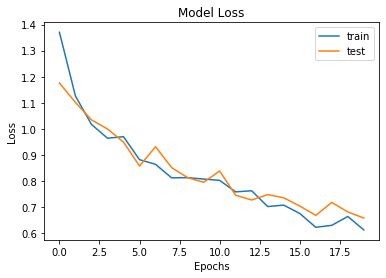

In [49]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


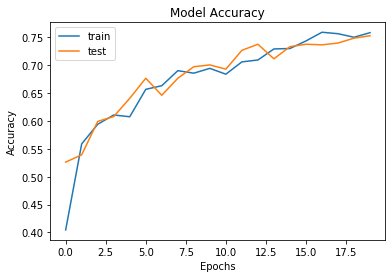

In [50]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [51]:
# getting predictions on val set.
pred=model.predict(test_images)
pred_digits=np.argmax(pred,axis=1)

In [52]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(test_labels)):
    if(np.argmax(test_labels[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(test_labels)):
    if(not np.argmax(test_labels[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

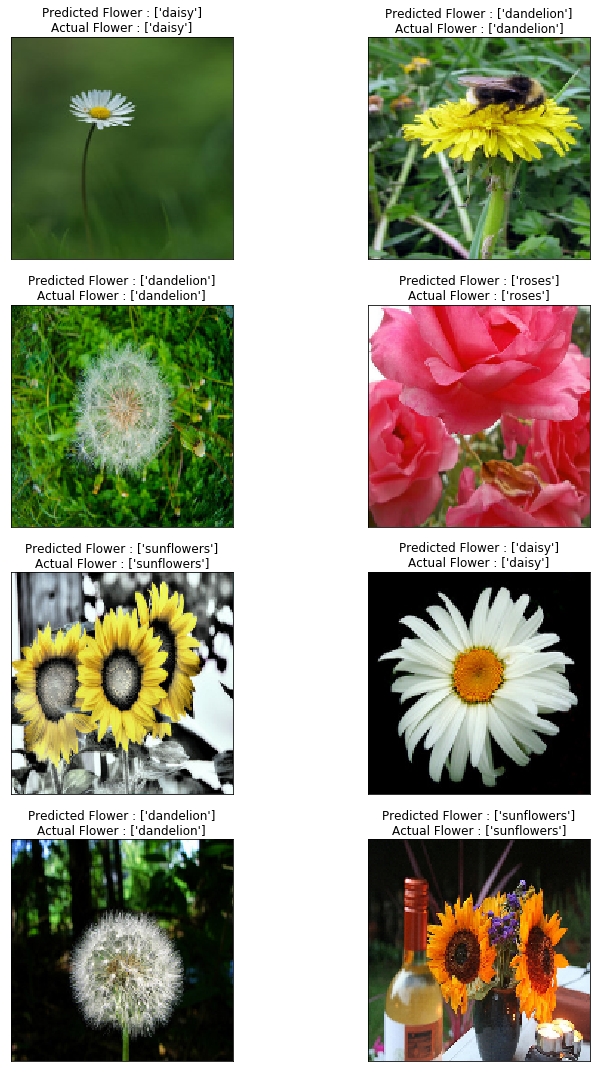

In [56]:

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        img=test_images[prop_class[count]]
        ax[i,j].imshow(img)
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits     [prop_class[count      ]]]))+"\n"+ \
                          "Actual Flower : "   +str(le.inverse_transform([np.argmax(test_labels[prop_class[count      ]])]))    \
                         )
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        plt.tight_layout()
        count+=1

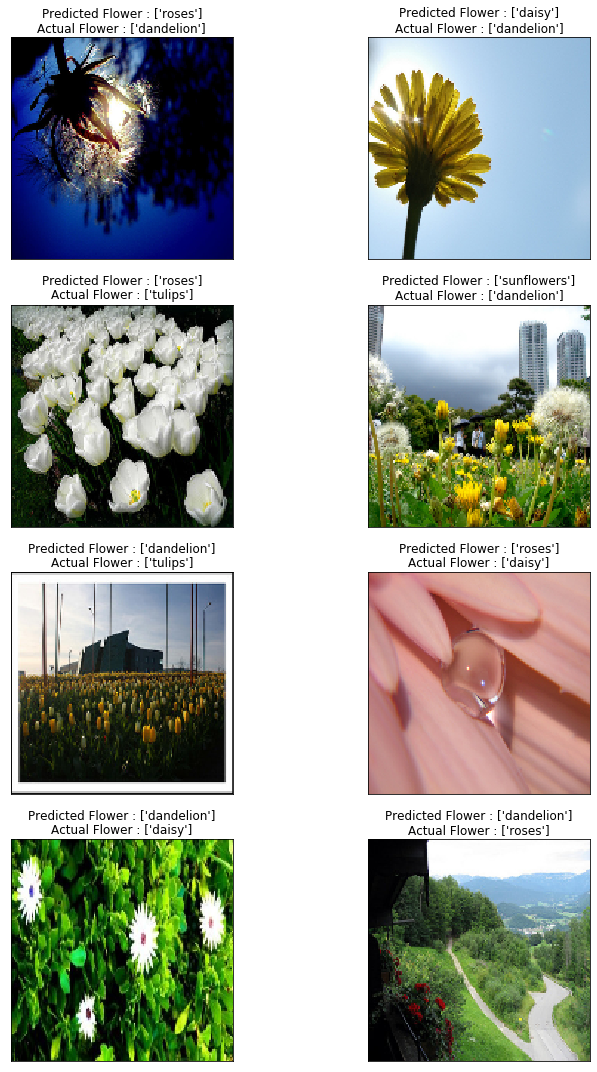

In [57]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        img=test_images[mis_class[count]]
        ax[i,j].imshow(img)
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+ \
                          "Actual Flower : "   +str(le.inverse_transform([np.argmax([test_labels[mis_class[count]]])])) \
                          )

        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        plt.tight_layout()
        count+=1
